# Sentiment Analysis of Customer Reviews
This project performs sentiment analysis on customer review data using various machine learning models. The focus is on determining whether a review expresses a positive ("happy") or negative ("not happy") sentiment.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset
Source: Kaggle

In [2]:
df = pd.read_csv(r"Hotel_Data/train.csv")
print(f"Dataset Shape:{df.shape}")
df.head()

Dataset Shape:(38932, 5)


,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [3]:
df1 = pd.read_csv(r"Hotel_Data/test.csv")
print(f"Dataset Shape:{df1.shape}")

df1.head()

Dataset Shape:(29404, 4)


,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile


**Description**: Raw customer review

**Is_Response**: Sentiment label (happy / not happy)



In [4]:
print(f"Feature Names:{df.columns.values}")

Feature Names:['User_ID' 'Description' 'Browser_Used' 'Device_Used' 'Is_Response']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [6]:
count = df.isnull().sum()
percentage = (df.isnull().sum()/len(df))*100
missing_data = pd.concat([count, percentage], axis = 1, keys = ['Count', 'Percentage'])
print(f'Count and Percentage of missing values:')
print(missing_data)

Count and Percentage of missing values:
              Count  Percentage
User_ID           0         0.0
Description       0         0.0
Browser_Used      0         0.0
Device_Used       0         0.0
Is_Response       0         0.0


In [7]:
df.describe()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
count,38932,38932,38932,38932,38932
unique,38932,38932,11,3,2
top,id10326,The room was kind of clean but had a VERY stro...,Firefox,Desktop,happy
freq,1,1,7367,15026,26521


In [8]:
df.describe().T

,count,unique,top,freq
User_ID,38932,38932,id10326,1
Description,38932,38932,The room was kind of clean but had a VERY stro...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


In [9]:
df["length"] = df["Description"].apply(len)
df.sample(5)

,User_ID,Description,Browser_Used,Device_Used,Is_Response,length
10905,id21231,Recently renovated the hotel is a great choice...,Safari,Desktop,happy,654
12621,id22947,I and my husband stayed in Hotel -- during our...,Chrome,Desktop,happy,2071
5038,id15364,Our family required a suite for a couple of da...,Google Chrome,Tablet,happy,685
12537,id22863,"Adjacent to Balboa Park in central San Diego, ...",IE,Mobile,happy,608
16572,id26898,The Polar Bar staff is the best in the country...,InternetExplorer,Tablet,happy,205


In [10]:
count = df['Is_Response'].value_counts()

percentage = round(df['Is_Response'].value_counts(normalize=True) * 100, 2)

response_summary = pd.concat([count, percentage], axis=1, keys = ['Count', 'Percentage'])
print("Response Summary:")
print(response_summary)

Response Summary:
             Count  Percentage
Is_Response                   
happy        26521       68.12
not happy    12411       31.88


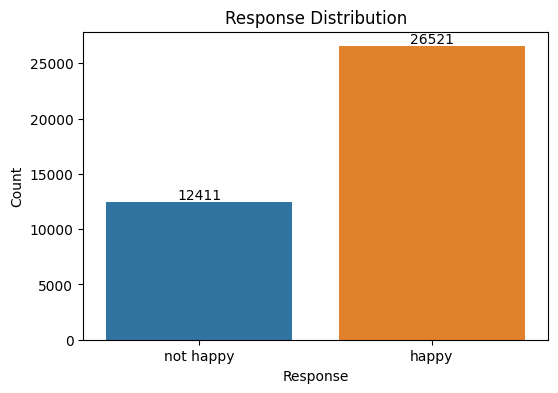

In [11]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x = 'Is_Response', data = df, hue = 'Is_Response')

for bar in ax.containers:
    ax.bar_label(bar)

plt.title("Response Distribution")
plt.xlabel("Response")
plt.ylabel("Count")

plt.show()

# Data Preprocessing:

In [12]:
df.columns

Index(['User_ID', 'Description', 'Browser_Used', 'Device_Used', 'Is_Response',
       'length'],
      dtype='object')

In [13]:
df.drop(columns = ['User_ID','Browser_Used','Device_Used'], inplace = True)
df.head()

,Description,Is_Response,length
0,The room was kind of clean but had a VERY stro...,not happy,248
1,I stayed at the Crown Plaza April -- - April -...,not happy,1077
2,I booked this hotel through Hotwire at the low...,not happy,1327
3,Stayed here with husband and sons on the way t...,happy,502
4,My girlfriends and I stayed here to celebrate ...,not happy,1613


In [14]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower().strip()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = word_tokenize(text)
    # tokens = [word for word in tokens if word not in stop_words] 
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

df['Cleaned_Description'] = df['Description'].fillna('').apply(preprocess_text)

# Preprocessing Pipeline

*1. Basic text cleaning*:

      Lowercasing, Remove newlines, Remove brackets , Remove punctuation, Remove numbers, Normalize whitespace.

*2. Tokenization and Lemmatization*

*3. Stop words kept intentionally to preserve context (e.g., "not bad")*

In [15]:
df.head(10)

,Description,Is_Response,length,Cleaned_Description
0,The room was kind of clean but had a VERY stro...,not happy,248,the room wa kind of clean but had a very stron...
1,I stayed at the Crown Plaza April -- - April -...,not happy,1077,i stayed at the crown plaza april april the st...
2,I booked this hotel through Hotwire at the low...,not happy,1327,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,502,stayed here with husband and son on the way to...
4,My girlfriends and I stayed here to celebrate ...,not happy,1613,my girlfriend and i stayed here to celebrate o...
5,We had - rooms. One was very nice and clearly ...,happy,610,we had room one wa very nice and clearly had b...
6,My husband and I have stayed in this hotel a f...,not happy,492,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,935,my wife i stayed in this glorious city a while...
8,My boyfriend and I stayed at the Fairmont on a...,happy,639,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,358,wonderful staff great location but it wa defin...


In [16]:
from wordcloud import WordCloud
#Converting into string.
res_text = " ".join([i for i in df['Cleaned_Description'] if not i.isdigit()])

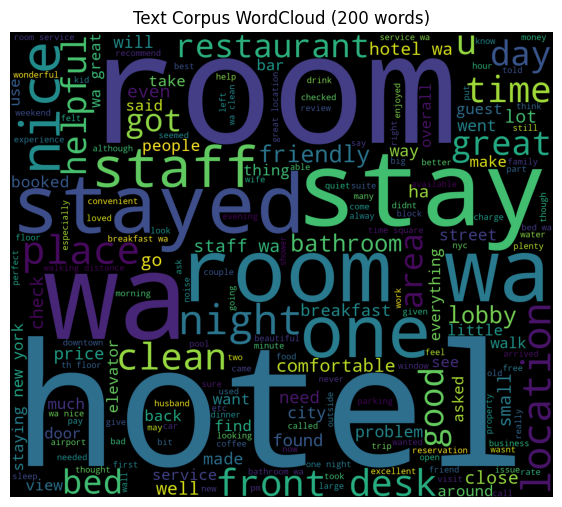

In [17]:
plt.subplots(figsize=(7,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=200,
                          width=1400,
                          height=1200
                         ).generate(res_text)


plt.imshow(wordcloud)
plt.title('Text Corpus WordCloud (200 words)')
plt.axis('off')
plt.show()

# Model Training:

In [18]:
#pip install scikit-learn
from sklearn.model_selection import train_test_split

x = df['Cleaned_Description']
y = df['Is_Response']

x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 0)
print('x_train:', len(x_train))
print('x_test:', len(x_test))
print('y_train:', len(x_train))
print('y_test:', len(x_test))

x_train: 35038
x_test: 3894
y_train: 35038
y_test: 3894


LogisticRegression:

In [19]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression

# tvec = TfidfVectorizer()   # Converts text into TF-IDF features (numeric).

# clf = LogisticRegression(solver="lbfgs", max_iter=1000)  

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

tvec = TfidfVectorizer(ngram_range=(1,2), stop_words=None)  
clf = LogisticRegression()

lg_model = Pipeline([('vectorizer', tvec), ('classifier', clf)])
lg_model.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('classifier', LogisticRegression())])

N-gram range (1,2) helps capture important phrases like "not good" and "very happy"

In [21]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline

# tvec = TfidfVectorizer(ngram_range=(1,2), stop_words='english') 
# clf = LogisticRegression()

# lg_model = Pipeline([('vectorizer', tvec), ('classifier', clf)])
# lg_model.fit(x_train, y_train)

Model Prediction:

In [22]:
# Evaluate the model.
print("Train score:", lg_model.score(x_train, y_train))
print("Test score:", lg_model.score(x_test, y_test))

Train score: 0.9338147154517952
Test score: 0.886748844375963


In [23]:
from sklearn.metrics import f1_score

Ptrain = lg_model.predict(x_train)
Ptest = lg_model.predict(x_test)

print("Train F1:", f1_score(y_train, Ptrain, pos_label='happy'))
print("Test F1:", f1_score(y_test, Ptest, pos_label='happy'))

Train F1: 0.9525970442141412
Test F1: 0.9181969949916527


In [24]:
from sklearn.metrics import roc_auc_score
# Predict Probabilities
Prob_train = lg_model.predict_proba(x_train)[:, 1]
Prob_test = lg_model.predict_proba(x_test)[:, 1]

# Compute AUC scores
print("Train AUC:", roc_auc_score(y_train, Prob_train))
print("Test AUC:", roc_auc_score(y_test, Prob_test))

Train AUC: 0.978621078542513
Test AUC: 0.9487346846707678


In [25]:
from sklearn.metrics import confusion_matrix
Ptrain = lg_model.predict(x_train)

cm = confusion_matrix(y_train, Ptrain, normalize = "true")
cm

array([[0.97501883, 0.02498117],
       [0.1545781 , 0.8454219 ]])

In [26]:
from sklearn.metrics import confusion_matrix
Ptrain = lg_model.predict(x_train)

cm = confusion_matrix(y_train, Ptrain)
cm

array([[23301,   597],
       [ 1722,  9418]])

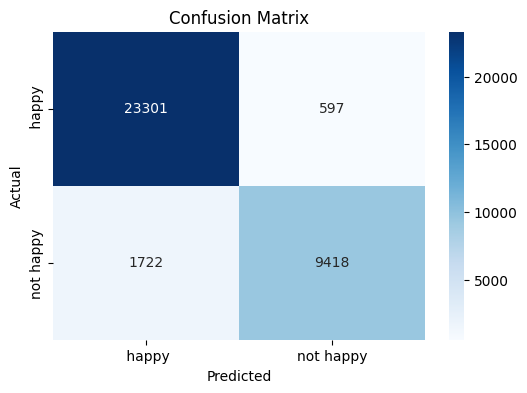

In [27]:
plt.figure(figsize=(6,4))
def plot_cm(cm):
    classes = [" happy", "not happy"]
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    
    ax = sns.heatmap(df_cm, annot=True, fmt="g", cmap="Blues")
    ax.set_ylabel("Actual")
    ax.set_xlabel("Predicted")
    plt.title("Confusion Matrix")
plot_cm(cm)


In [28]:
Ptest = lg_model.predict(x_test)
cm2 = confusion_matrix(y_test, Ptest, normalize ="true")
cm2

array([[0.94357606, 0.05642394],
       [0.23052714, 0.76947286]])

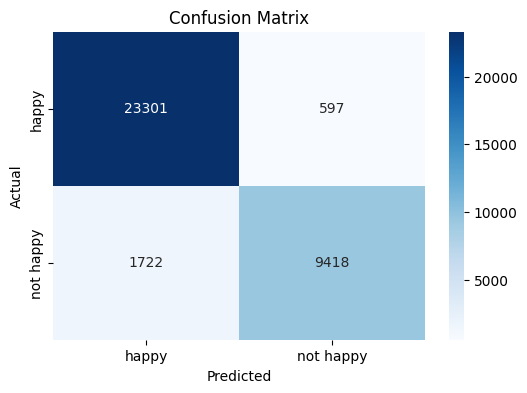

In [29]:
plt.figure(figsize=(6,4))
def plot_cm(cm2):
    classes = ["happy", "not happy"]
    df_cm2 = pd.DataFrame(cm, index=classes, columns=classes)
    
    ax = sns.heatmap(df_cm2, annot=True, fmt="g", cmap="Blues")
    ax.set_ylabel("Actual")
    ax.set_xlabel("Predicted")
    plt.title("Confusion Matrix")
plot_cm(cm2)

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Ptest = lg_model.predict(x_test)

print("Test Accuracy  :", accuracy_score(y_test, Ptest))
print("Test Precision :", precision_score(y_test, Ptest, average="weighted"))
print("Test Recall    :", recall_score(y_test, Ptest, average="weighted"))
print("Test F1 Score  :", f1_score(y_test, Ptest, pos_label='happy'))

Test Accuracy  : 0.886748844375963
Test Precision : 0.8857960997952745
Test Recall    : 0.886748844375963
Test F1 Score  : 0.9181969949916527


Random Forest:

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
tvec = TfidfVectorizer(ngram_range=(1,2), stop_words=None)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [32]:
from sklearn.pipeline import Pipeline
rf_model = Pipeline([('vectorizer',tvec),('classifier', clf)])

rf_model.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('classifier', RandomForestClassifier(random_state=42))])

In [33]:
# Evaluate the model.
print("Train score:",rf_model.score(x_train, y_train))
print("Test score:", rf_model.score(x_test, y_test))

Train score: 1.0
Test score: 0.8040575243965075


In [34]:
from sklearn.metrics import f1_score

Ptrain = rf_model.predict(x_train)
Ptest = rf_model.predict(x_test)

print("Train F1:", f1_score(y_train, Ptrain, pos_label='happy'))
print("Test F1:", f1_score(y_test, Ptest, pos_label='happy'))

Train F1: 1.0
Test F1: 0.8709622864874006


In [35]:
from sklearn.metrics import roc_auc_score
# Predict Probabilities
Prob_train = rf_model.predict_proba(x_train)[:, 1]
Prob_test = rf_model.predict_proba(x_test)[:, 1]

# Compute AUC scores
print("Train AUC:", roc_auc_score(y_train, Prob_train))
print("Test AUC:", roc_auc_score(y_test, Prob_test))

Train AUC: 0.9999999999999999
Test AUC: 0.9136456445178869


In [36]:
from sklearn.metrics import confusion_matrix
Ptrain = rf_model.predict(x_train)

cm = confusion_matrix(y_train, Ptrain)
cm

array([[23898,     0],
       [    0, 11140]])

In [37]:
from sklearn.metrics import confusion_matrix
Ptest = rf_model.predict(x_test)

cm2 = confusion_matrix(y_test, Ptest)
cm2

array([[2575,   48],
       [ 715,  556]])

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy  :", accuracy_score(y_test, Ptest))
print("Precision :", precision_score(y_test, Ptest, average="weighted"))
print("Recall    :", recall_score(y_test, Ptest, average="weighted"))

Accuracy  : 0.8040575243965075
Precision : 0.8276705969530342
Recall    : 0.8040575243965075


**Bayes Model:**

In [39]:
from sklearn.naive_bayes import MultinomialNB

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

tvec = TfidfVectorizer(ngram_range=(1,2), stop_words=None)  
clf = MultinomialNB()

nb_model = Pipeline([('vectorizer', tvec), ('classifier', clf)])
nb_model.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('classifier', MultinomialNB())])

In [41]:
# Evaluate the model
print("Train score:", nb_model.score(x_train, y_train))
print("Test score:", nb_model.score(x_test, y_test))

Train score: 0.7124265083623494
Test score: 0.6874678993323061


In [42]:
from sklearn.metrics import confusion_matrix
Ptrain= nb_model.predict(x_train)
cm2 = confusion_matrix(y_train, Ptrain)
cm2

array([[23898,     0],
       [10076,  1064]])

In [43]:
Ptest = nb_model.predict(x_test)
cm2 = confusion_matrix(y_test, Ptest)
cm2

array([[2622,    1],
       [1216,   55]])

 Logistic Regression performed best across all metrics and was chosen as the final model.



In this project, the dataset contains imbalanced classes — meaning there are significantly more "happy" responses than "not happy" . In such cases accuracy may be misleading. So, we used F1, score, AUC curve and Confusion Matrix.


**Try On New Review:**

In [44]:
result = lg_model.predict(df1["Description"])
df1["Predicted_Label"] = result
print(df1[["Description", "Predicted_Label"]])


                                             Description Predicted_Label
0      Looking for a motel in close proximity to TV t...       not happy
1      Walking distance to Madison Square Garden and ...           happy
2      Visited Seattle on business. Spent - nights in...       not happy
3      This hotel location is excellent and the rooms...       not happy
4      This hotel is awesome I love the service Antho...           happy
...                                                  ...             ...
29399  I stayed at the hotel and towers for a confere...           happy
29400  Trying to stay within the Marriott family and ...           happy
29401  We stayed for - nights with our little dog,ver...           happy
29402  Stayed at the Yotel over the weekend and was v...           happy
29403  The Blakely is is comfortable is every way: th...           happy

[29404 rows x 2 columns]


In [45]:
print(lg_model.predict(["The hotel was amazing!"]))

['happy']


In [46]:
test_text=["Looking for a motel in close proximity to TV taping of a Dr. Phil show, we chose the Dunes on Sunset Blvd in West Hollywood. Although the property displayed the AAA emblem, it certainly left a lot to be desired. There were chips & scrapes on the bottom of the door frame in the bathroom and the lotion containers were half full--apparently not replaced by housekeeping. We needed an early wakeup call, but couldn't use the clock radio alarm as there wasn't a radio in the room. There was no TV channel listing on the remote, or on the TV menu making viewing a chore.The TV remote had to be returned when checking-out. This place served its purpose, but not a place to revisit. "]
result = lg_model.predict(test_text)

print(result)

['not happy']


In [47]:
Review2 = ["Walking distance to Madison Square Garden and the Penn Subway Station. Also very close to lots of retail stores and restaurants. The hotel offers free internet, a gym and a hot breakfast. Our room was on the top floor facing --th St. The room was clean and the staff very helpful and accommodating. The downside was that the A-C was making a noise and the faucet in the bathroom was loose - things that can be easily fixed. We walked from the hotel to Madison Square Gardens, to Times Square and on to Broadway. Everything considered, I will definitely recommend this hotel to my friends. "]
result = lg_model.predict(Review2)
print(result)

['happy']


In [48]:
test_text = ["I had a fantastic stay at this hotel! The staff were incredibly welcoming, the room was spotless and comfortable, and the location was perfect for exploring the city. The breakfast buffet had a great variety of options, and the service was top-notch. I would definitely stay here again!"]
result = lg_model.predict(test_text)
print(result)

['happy']


In [49]:
test_text = ["I was really disappointed with my stay. The room was small and not very clean, the air conditioning didn’t work properly, and the staff were unhelpful. The noise from the street kept me up all night. Definitely not worth the price."]
result = lg_model.predict(test_text)
print(result)

['not happy']


In [50]:
Review1 = [" not good"]
result = lg_model.predict(Review1)

print(result)

['not happy']


In [51]:
Review1 = ["I'm  not satisfied"]
result = lg_model.predict(Review1)

print(result)

['not happy']


In [52]:
Review2 = ["not good "]
result = lg_model.predict(Review2)

print(result)

['not happy']


In [53]:
Review3 = ["The hotel is very good. Food was good, housekeeping could have been better. The staff was ok"]
result = rf_model.predict(Review3)

print(result)

['happy']


In [54]:
# import joblib
# joblib.dump(lg_model, 'model.pkl')
# print("Model saved as model.pkl successfully.")